In [5]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split


In [4]:
# Read in the training set
full_train = pd.read_csv('Prepared_Data/Training_DF_PCA.csv')

# Read in the prediction test set
test_pred = pd.read_csv('Prepared_Data/Test_DF_PCA.csv')

In [9]:
# Change the columns type to category
cat_col = ['Year','Month','Day','Time','holiday_ind']
full_train[cat_col] = full_train[cat_col].astype('category')
# Split the train test of the full train
y = full_train['CF'].values
X = full_train.drop(['CF','DATETIME'],axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=False)

# Grid Search for the best parameter

In [20]:
# Parameters Grid
param_grid = {
    'learning_rate': [0.02,0.05, 0.1,0.15],
    'max_depth': [3,7,10,15],
    'n_estimators': [100, 300, 600,900],
}
# Initiate XGBoost
xgb_model = xgb.XGBRegressor()
# Set up the grid search
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           n_jobs=4,
                           cv=3,
                           verbose=0)
# fit the grid search to find the best parameter
grid_search.fit(X_train, y_train,
                eval_metric='mae',
                eval_set =[(X_test, y_test)])


[0]	validation_0-mae:0.12759
[1]	validation_0-mae:0.12388
[2]	validation_0-mae:0.11991
[3]	validation_0-mae:0.11642
[4]	validation_0-mae:0.11331
[5]	validation_0-mae:0.11013
[6]	validation_0-mae:0.10701
[7]	validation_0-mae:0.10433
[8]	validation_0-mae:0.10165
[9]	validation_0-mae:0.09956
[10]	validation_0-mae:0.09723
[11]	validation_0-mae:0.09518
[12]	validation_0-mae:0.09338
[13]	validation_0-mae:0.09167
[14]	validation_0-mae:0.08964
[15]	validation_0-mae:0.08797
[16]	validation_0-mae:0.08665
[17]	validation_0-mae:0.08570
[18]	validation_0-mae:0.08437
[19]	validation_0-mae:0.08379
[20]	validation_0-mae:0.08271
[21]	validation_0-mae:0.08158
[22]	validation_0-mae:0.08068
[23]	validation_0-mae:0.07978
[24]	validation_0-mae:0.07890
[25]	validation_0-mae:0.07815
[26]	validation_0-mae:0.07724
[27]	validation_0-mae:0.07620
[28]	validation_0-mae:0.07554
[29]	validation_0-mae:0.07477
[30]	validation_0-mae:0.07385
[31]	validation_0-mae:0.07342
[32]	validation_0-mae:0.07303
[33]	validation_0-ma

/Users/JasonZhang/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[89]	validation_0-mae:0.06327
[90]	validation_0-mae:0.06322
[91]	validation_0-mae:0.06329
[92]	validation_0-mae:0.06334
[93]	validation_0-mae:0.06299
[94]	validation_0-mae:0.06294
[95]	validation_0-mae:0.06290
[96]	validation_0-mae:0.06306
[97]	validation_0-mae:0.06315
[98]	validation_0-mae:0.06324
[99]	validation_0-mae:0.06295


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [24]:
# Use the best param
forecast_model = xgb.XGBRegressor(**grid_search.best_params_)
# Fit the model
forecast_model.fit(X_train, y_train)
# Predict on the validation 
val_result = forecast_model.predict(X_test)

In [41]:
# Print feature importance
for column, value in zip(full_train.drop(['CF','DATETIME'],axis=1).columns,forecast_model.feature_importances_):
    print(column, value)

Time 0.041220233
Year 0.0024205118
Month 0.03273991
Day 0.045070045
holiday_ind 0.0
low_corr_PCA_1 0.01870991
low_corr_PCA_2 0.18456481
low_corr_PCA_3 0.035011012
high_corr_cluster1_PCA_1 0.32431856
high_corr_cluster1_PCA_2 0.05360271
high_corr_cluster1_PCA_3 0.022041805
high_corr_cluster1_PCA_4 0.08085813
high_corr_cluster1_PCA_5 0.017757496
high_corr_cluster1_PCA_6 0.10408211
high_corr_cluster1_PCA_7 0.03760271
high_corr_cluster2_PCA_1 0.0
high_corr_cluster2_PCA_2 0.0
high_corr_cluster2_PCA_3 0.0
high_corr_cluster2_PCA_4 0.0
high_corr_cluster2_PCA_5 0.0
high_corr_cluster2_PCA_6 0.0
high_corr_cluster2_PCA_7 0.0
high_corr_cluster3_PCA_1 0.0
high_corr_cluster3_PCA_2 0.0
high_corr_cluster3_PCA_3 0.0
high_corr_cluster3_PCA_4 0.0
high_corr_cluster3_PCA_5 0.0
high_corr_cluster3_PCA_6 0.0
high_corr_cluster3_PCA_7 0.0


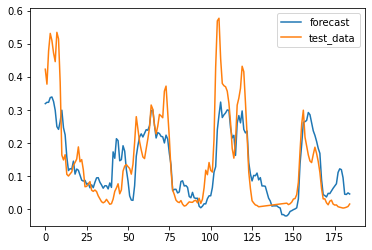

In [29]:
# Plot the forecast against the validation
plt.plot(val_result,label='forecast')
plt.plot(y_test,label='test_data')
plt.legend()

In [42]:
# Turn the testset column into category
test_pred[cat_col] = test_pred[cat_col].astype('category')
# Get the testset input
X_testpred = test_pred.drop(['CF','DATETIME'],axis=1).values

# Refit with entire dataset 
forecast_model.fit(X, y)
# Do prediction
test_pred['CF'] = forecast_model.predict(X_testpred)

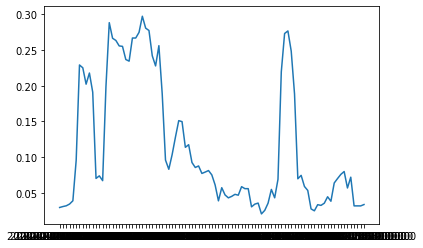

In [37]:
# Plot and View
plt.plot(test_pred['DATETIME'].values, test_pred['CF'].values)

In [38]:
# Write the output
test_pred.to_csv('final_output.csv',index=False)